In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# **task 1:**

1.Read covidtotals file and parse lastdate column as date

In [169]:
covid = pd.read_csv('/kaggle/input/covidtotals/covidtotals.csv', parse_dates=['lastdate'])
type(covid)

pandas.core.frame.DataFrame

2.Set and show the index and size for the COVID data (use iso_code as index).

In [170]:
# Set iso_code as the index
covid = pd.read_csv('/kaggle/input/covidtotals/covidtotals.csv')
covid.set_index("iso_code", inplace=True)
# Show the index 
covid.index

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=210)

In [171]:
#show the size
covid.size


2310

3.Show the shape and check to see whether index values are unqiue:

In [172]:
#showing the shape
covid.shape


(210, 11)

In [173]:
#Showing index values are unique
covid.index.nunique()

210

4.Show a sample of a few rows of the COVID case data:

In [174]:
covid.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


5.Get the descriptive statistics on the COVID totals and demographic columns

In [175]:
covid.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,210.000000,210.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1355.357943,55.659129,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2625.277497,144.785816,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,92.541500,0.884750,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,280.928500,6.154000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1801.394750,31.777250,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


# **task 2:**

1.Take a closer look at the distribution of values for the cases and deaths columns.
Hint : Use NumPy's arange method to pass a list of floats from 0 to 1.0 to the quantile method of the DataFrame.


In [176]:
covid["total_cases"].quantile(np.arange(0.0, 1.1, 0.1))

0.0          0.0
0.1         22.9
0.2        105.2
0.3        302.0
0.4        762.0
0.5       1242.5
0.6       2514.6
0.7       6959.8
0.8      16847.2
0.9      46513.1
1.0    1790191.0
Name: total_cases, dtype: float64

In [177]:
covid["total_deaths"].quantile(np.arange(0.0, 1.1, 0.1))

0.0         0.0
0.1         0.0
0.2         2.0
0.3         6.7
0.4        12.0
0.5        25.5
0.6        54.6
0.7       137.2
0.8       323.2
0.9      1616.9
1.0    104383.0
Name: total_deaths, dtype: float64

2.Draw a histogram of the distribution of total cases.

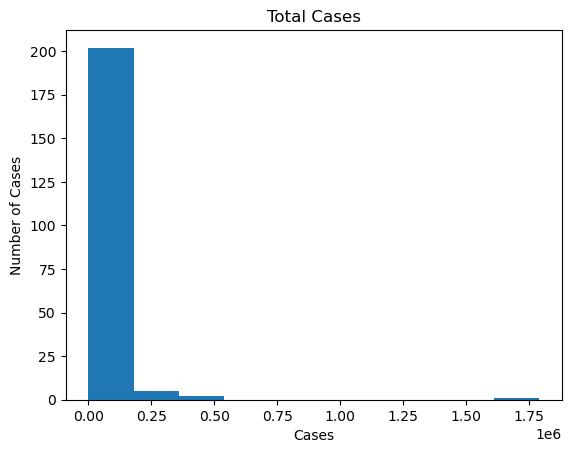

In [178]:
plt.hist(covid['total_cases'], bins=10)

plt.title("Total Cases")

plt.xlabel('Cases')

plt.ylabel("Number of Cases")

plt.show()

3.Based on your analysis are the 'total_cases'  and ‘total_deaths’ distributions skewed or not?  If skewed, to which direction? justify your answer.

 It seems that both the 'total_cases' and 'total_deaths' columns are heavily right-skewed. This is indicated by the fact that the median (50th percentile) for both columns is significantly smaller than the mean, and the upper quantiles (0.8, 0.9, 1.0) have much larger values than the lower quantiles (0.0 - 0.6). This indicates that there are a small number of countries with very high numbers of cases and deaths, while the majority of countries have relatively low numbers. Therefore, the direction of skewness is towards the right.

so to make sure i will try the code below:

In [179]:
print(covid['total_cases'].skew())
print(covid['total_deaths'].skew())

10.80427458456617
8.929815678725255
